In [1]:
%matplotlib inline

from game.tic_tac_toe import TicTacToeGame, GamePlayer, TicTacToeAction
from game.utils import play_game, play_games, plot_game_results
from game.agents import RandomAgent, MinMaxAgent, DQNAgent

Let 2 random agents play a battle of 1000 random games.

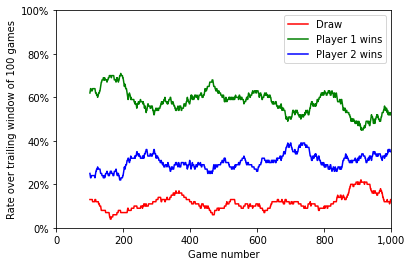

In [2]:
agents = [RandomAgent(0), RandomAgent(1)]
results = play_games(lambda: TicTacToeGame(), agents, 1000)
plot_game_results(results, len(agents))

Lets play the random player against the perfect min-max player.
As expected the random player can never win. The best result for him is a draw.

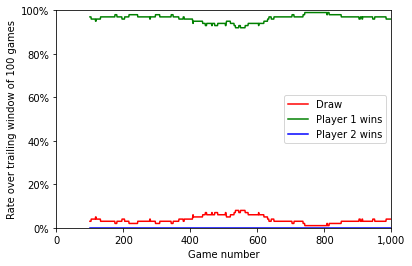

In [3]:
agents = [MinMaxAgent(0), RandomAgent(1)]
results = play_games(lambda: TicTacToeGame(), agents, 1000)
plot_game_results(results, len(agents))

The model of the DQN agent.

In [4]:
agent = DQNAgent(0)
agent.model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 27)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 243)          6804        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            244         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 9)            2196        dense[0][0]                      
_______________________________________________________________________________________

DQN training against a random player.

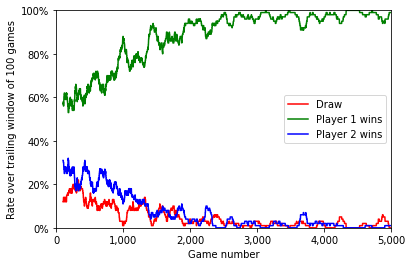

Against random agent:
After 1000 games we have draws: 25 (2.50%) and wins: 956 (95.60%), 19 (1.90%).
Against min-max agent:
After 1000 games we have draws: 1000 (100.00%) and wins: 0 (0.00%), 0 (0.00%).


<Figure size 432x288 with 0 Axes>

In [5]:
dqn_first = DQNAgent(0)
agents = [dqn_first, RandomAgent(1)]
play_games(lambda: TicTacToeGame(), agents, 5000, plot=True)
dqn_first.is_learning = False
print("Against random agent:")
play_games(lambda: TicTacToeGame(), [dqn_first, RandomAgent(1)], 1000, debug=True)
print("Against min-max agent:")
play_games(lambda: TicTacToeGame(), [dqn_first, MinMaxAgent(1)], 1000, debug=True)
pass

Now train the same pre-trained agent against the min-max agent:

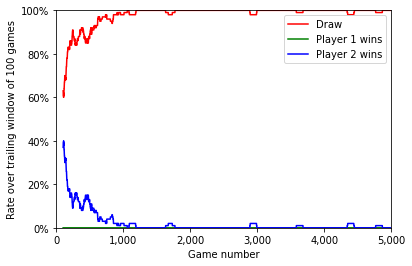

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dqnagent-first/assets
Against random agent:
After 1000 games we have draws: 103 (10.30%) and wins: 891 (89.10%), 6 (0.60%).
Against min-max agent:
After 1000 games we have draws: 1000 (100.00%) and wins: 0 (0.00%), 0 (0.00%).


<Figure size 432x288 with 0 Axes>

In [6]:
dqn_first.is_learning = True
agents = [dqn_first, MinMaxAgent(1)]
play_games(lambda: TicTacToeGame(), agents, 5000, plot=True)
dqn_first.model.save('dqnagent-first')
dqn_first.is_learning = False
print("Against random agent:")
play_games(lambda: TicTacToeGame(), [dqn_first, RandomAgent(1)], 1000, debug=True)
print("Against min-max agent:")
play_games(lambda: TicTacToeGame(), [dqn_first, MinMaxAgent(1)], 1000, debug=True)
pass

What if the DQN agent goes second?

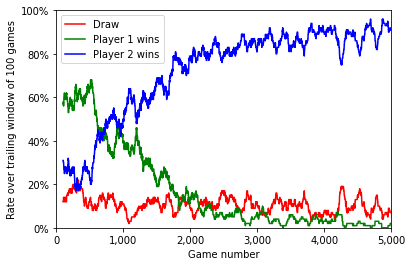

Against random agent:
After 1000 games we have draws: 86 (8.60%) and wins: 27 (2.70%), 887 (88.70%).
Against min-max agent:
After 1000 games we have draws: 808 (80.80%) and wins: 192 (19.20%), 0 (0.00%).


<Figure size 432x288 with 0 Axes>

In [7]:
dqn_second = DQNAgent(1)
agents = [RandomAgent(0), dqn_second]
play_games(lambda: TicTacToeGame(), agents, 5000, plot=True)
dqn_second.is_learning = False
print("Against random agent:")
play_games(lambda: TicTacToeGame(), [RandomAgent(0), dqn_second], 1000, debug=True)
print("Against min-max agent:")
play_games(lambda: TicTacToeGame(), [MinMaxAgent(0), dqn_second], 1000, debug=True)
pass

Now train the same pre-trained agent against the min-max agent:

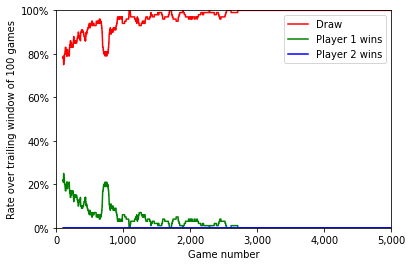

INFO:tensorflow:Assets written to: dqnagent-second/assets
Against random agent:
After 1000 games we have draws: 112 (11.20%) and wins: 1 (0.10%), 887 (88.70%).
Against min-max agent:
After 1000 games we have draws: 1000 (100.00%) and wins: 0 (0.00%), 0 (0.00%).


<Figure size 432x288 with 0 Axes>

In [8]:
dqn_second.is_learning = True
agents = [MinMaxAgent(0), dqn_second]
play_games(lambda: TicTacToeGame(), agents, 5000, plot=True)
dqn_first.model.save('dqnagent-second')
dqn_first.is_learning = False
print("Against random agent:")
play_games(lambda: TicTacToeGame(), [RandomAgent(0), dqn_second], 1000, debug=True)
print("Against min-max agent:")
play_games(lambda: TicTacToeGame(), [MinMaxAgent(0), dqn_second], 1000, debug=True)
pass

In [9]:
dqn_first.is_learning = False
dqn_second.is_learning = False
agents = [dqn_first, dqn_second]
game = TicTacToeGame()
while not agents[game.get_current_agent()].next(game):
    print(game)
    print()
print(game)

 | | 
-----
 |o| 
-----
 | | 

 | | 
-----
 |o| 
-----
 | |x

 | |o
-----
 |o| 
-----
 | |x

 | |o
-----
 |o| 
-----
x| |x

 | |o
-----
 |o| 
-----
x|o|x

 |x|o
-----
 |o| 
-----
x|o|x

o|x|o
-----
 |o| 
-----
x|o|x

o|x|o
-----
x|o| 
-----
x|o|x

o|x|o
-----
x|o|o
-----
x|o|x
